In [ ]:
"""
COMP 559 Homework 3 Non-linear Embedding

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("../../../graph_tools")
sys.path.append("../../../../datasci_tools/datasci_tools/")
sys.path.append("../../../../machine_learning_tools/machine_learning_tools/")

In [3]:
import networkx_utils as xu
import graph_statistics as gs
import graph_preprocessing as gpre
import graph_visualizations as gviz
import networkx as nx
import matplotlib.pyplot as plt

# Importing the MNIST dataset

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import h5py 
from functools import reduce
def hdf5(path,
         data_key = "data", 
         target_key = "target", 
         flatten = True):
    """
        loads data from hdf5: 
        - hdf5 should have 'train' and 'test' groups 
        - each group should have 'data' and 'target' dataset or spcify the key
        - flatten means to flatten images N * (C * H * W) as N * D array
    """
    with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get(data_key)[:]
        y_tr = train.get(target_key)[:]
        test = hf.get('test')
        X_te = test.get(data_key)[:]
        y_te = test.get(target_key)[:]
        if flatten:
            X_tr = X_tr.reshape(X_tr.shape[0], reduce(lambda a, b: a * b, X_tr.shape[1:]))
            X_te = X_te.reshape(X_te.shape[0], reduce(lambda a, b: a * b, X_te.shape[1:]))
    return X_tr, y_tr, X_te, y_te

In [5]:
X_tr, y_tr, X_te, y_te = hdf5("./usps.h5")
X_tr.shape, X_te.shape

((7291, 256), (2007, 256))

In [6]:
import pandas as pd
import pandas_ml as pdml

target_name = "y"

df_train = pd.DataFrame(X_tr)
df_train[target_name] = y_tr
df_test = pd.DataFrame(X_te)
df_test[target_name] = y_te
df_test

X_train,y_train = pdml.X_y(df_train,target_name=target_name)
X_test,y_test = pdml.X_y(df_test,target_name=target_name)

X_train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.1845,0.9310,0.4165,...,0.6520,0.9115,1.0000,0.7410,0.2630,0.0045,0.0000,0.0000,0.000,0.0
1,0.0,0.0,0.0,0.0935,0.1645,0.0955,0.0565,0.1645,0.0735,0.0000,...,0.1645,0.1645,0.4835,0.8805,0.8810,0.5630,0.4525,0.1645,0.086,0.0
2,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020,...,0.0000,0.0000,0.0000,0.4455,1.0000,0.4105,0.0000,0.0000,0.000,0.0
3,0.0,0.0,0.0,0.0000,0.0000,0.3635,0.8420,0.9800,0.7250,0.4665,...,0.3410,1.0000,0.7680,0.0065,0.0000,0.0000,0.0000,0.0000,0.000,0.0
4,0.0,0.0,0.0,0.0000,0.0000,0.0360,0.3980,0.8755,0.7330,0.6170,...,0.7330,0.8195,1.0000,1.0000,0.8955,0.7195,0.4005,0.0585,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,0.0,0.0,0.0,0.0060,0.2365,0.3960,0.8100,1.0000,0.7335,0.6980,...,0.4420,0.9495,0.7080,0.2450,0.0000,0.0000,0.0000,0.0000,0.000,0.0
7287,0.0,0.0,0.0,0.0050,0.8540,0.7785,0.6735,0.4465,0.1210,0.0125,...,0.8485,0.8180,0.5835,0.0160,0.0000,0.0000,0.0000,0.0000,0.000,0.0
7288,0.0,0.0,0.0,0.1085,0.0080,0.0865,0.5340,1.0000,1.0000,1.0000,...,0.9025,1.0000,1.0000,0.8635,0.3290,0.0335,0.0000,0.0000,0.000,0.0
7289,0.0,0.0,0.0,0.0000,0.0000,0.2255,0.7315,0.9995,0.9995,0.9995,...,0.3845,0.8105,0.9995,0.4790,0.3845,0.1565,0.0000,0.0000,0.000,0.0


In [8]:
X_total = pd.concat([X_train,X_test])
y_total = pd.concat([y_train,y_test])

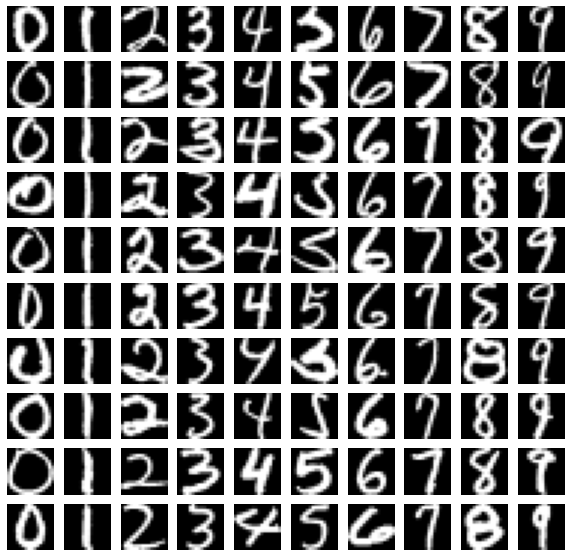

In [9]:
num_samples = 10
num_classes = len(set(y_tr))

classes = set(y_tr)
num_classes = len(classes)
fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples))

for label in range(num_classes):
    class_idxs = np.where(y_tr == label)
    for i, idx in enumerate(np.random.randint(0, class_idxs[0].shape[0], num_samples)):
        ax[i, label].imshow(X_tr[class_idxs[0][idx]].reshape([16, 16]), 'gray')
        ax[i, label].set_axis_off()

# Example of building a classifier on data

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X=X_train, y=y_train)

preds = knn_clf.predict(X_test)
accuracy = sum((preds == y_test))/len(y_test)
print("Accuracy of KNN, ", accuracy)

Accuracy of KNN,  0.9446935724962631


# --------- Starting analysis of the data ----

In [13]:
X = X_total
y = y_total

# Normalizing the data

In [14]:
normalize  = True

In [15]:
import preprocessing_ml as preml

scaler = preml.get_scaler("normal_dist")
scaler.fit(X)

if normalize:
    X = preml.scale_df(
        X,
        scaler_trained=scaler,
        verbose = True)

scaler = StandardScaler()


# ---- Running Dimensionality Reductions ---

In [18]:
"""
Will try 3 dimensionality reduction techniques: 
1) PCA: maximizes the variance
2) Isomap: eigenvector decomposition of a pairwise distance
matrix  that is doubly centered
3) Laplacian eigenmaps: eigenvector decomposition
   of the Laplacian of a graph of X where the edges weights are 
   the similarity between points

"""
import dimensionality_reduction_ml as dru
from sklearn import decomposition,manifold
from sklearn.cluster import KMeans

# Metrics on How good the clustering was

In [19]:
"""
Metrics we will use to compute how good the 
clustering algorithm did on top of the non linear embedding

1) Purity: the average overlap of each cluster with the best fit class 
    (bad for imbalanced datasets and favors small clusters)

2) Mutual Information: computes the mutual information of the clusters 
learned and the true clusters (while being normallied by the entropy of the clusters)

3) (adjusted) Rand index: Pairwise agreements of cluster assignments that were correct divided by 
all possible pairwise combinations
(if adjusted then just compare to the expected value if random)
"""
import clustering_ml as clu

# Looping through the dimensionality reduction 



 ----Working on n_components = 1----
Time for fitting non-linear embedding PCA: 0.8116409778594971
Time for fitting non-linear embedding Isomap: 159.18383741378784
Time for fitting non-linear embedding Laplacian_Eigenmaps: 290.31321120262146


 ----Working on n_components = 2----
Time for fitting non-linear embedding PCA: 1.182382583618164
Time for fitting non-linear embedding Isomap: 164.651047706604
Time for fitting non-linear embedding Laplacian_Eigenmaps: 291.62228989601135


 ----Working on n_components = 3----


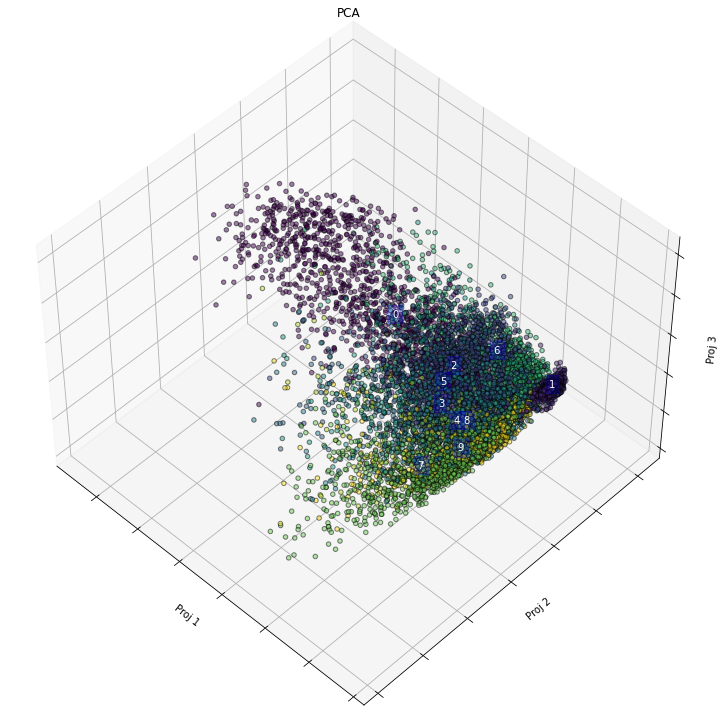

Time for fitting non-linear embedding PCA: 1.6793642044067383


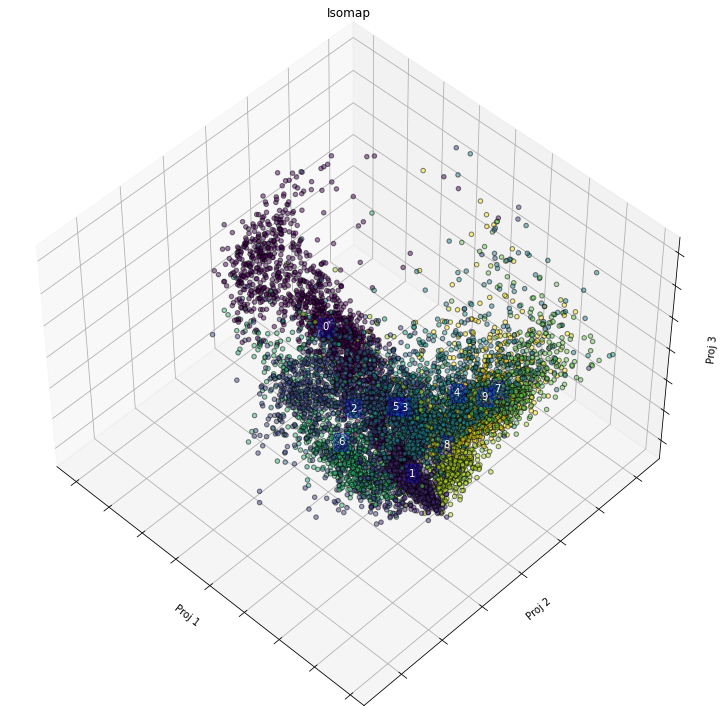

Time for fitting non-linear embedding Isomap: 166.1238615512848


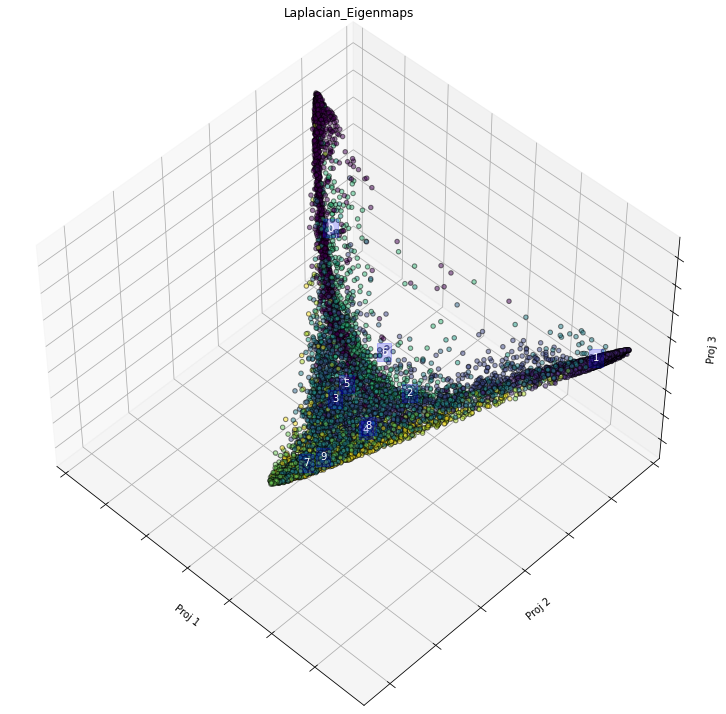

Time for fitting non-linear embedding Laplacian_Eigenmaps: 291.76208114624023


 ----Working on n_components = 4----
Time for fitting non-linear embedding PCA: 0.953768253326416
Time for fitting non-linear embedding Isomap: 162.28120255470276
Time for fitting non-linear embedding Laplacian_Eigenmaps: 294.0550148487091


 ----Working on n_components = 5----
Time for fitting non-linear embedding PCA: 1.2269628047943115
Time for fitting non-linear embedding Isomap: 163.19673991203308
Time for fitting non-linear embedding Laplacian_Eigenmaps: 298.39919424057007


 ----Working on n_components = 6----
Time for fitting non-linear embedding PCA: 1.2152085304260254
Time for fitting non-linear embedding Isomap: 166.62942838668823
Time for fitting non-linear embedding Laplacian_Eigenmaps: 296.5749936103821


 ----Working on n_components = 7----
Time for fitting non-linear embedding PCA: 1.8704633712768555
Time for fitting non-linear embedding Isomap: 164.25980043411255
Time for fitting non-linear

In [21]:
import time

%matplotlib inline

dim_red_methods = dict(
    PCA = decomposition.PCA,
    Isomap =manifold.Isomap,
    Laplacian_Eigenmaps = manifold.SpectralEmbedding,

)

metric_funcs =["purity_score","normalized_mutual_info_score","adjusted_rand_score"]


verbose = True
plot_projections = False
n_components_to_plot = [3]
n_clusters = 10

dim_results = []

for n_components in range(1,11):
    if verbose:
        print(f"\n\n ----Working on n_components = {n_components}----")
    for dim_red_name,model_func in dim_red_methods.items():
        st = time.time()

        model = model_func(n_components=n_components)
        X_trans = model.fit_transform(X)

        if plot_projections or n_components in n_components_to_plot:
            dru.plot_projected_data(
               X_trans,
               labels = y,
               title = f"{dim_red_name}",
                use_labels_as_text_to_plot = True,

            )

        #running the clustering:
        clf = KMeans(n_clusters=n_clusters,
                    random_state=0)

        clf.fit(X_trans)
        y_pred = clf.labels_

        projection_output = dict(
            X_trans = X_trans,
            y_pred = y_pred
        )

        metric_output = dict([(metric_name,getattr(clu,metric_name)(labels_true = y,labels_pred = y_pred)) 
                          for metric_name in metric_funcs])

        output_dict = dict(name = dim_red_name,
                          n_components = n_components)
        for k in [projection_output,metric_output]:
            output_dict.update(k)

        dim_results.append(output_dict)

        if verbose:
            print(f"Time for fitting non-linear embedding {dim_red_name}: {time.time() - st}")

In [22]:
df_results = pd.DataFrame.from_records(dim_results)
df_results

,name,n_components,X_trans,y_pred,purity_score,normalized_mutual_info_score,adjusted_rand_score
0,PCA,1,"[[4.3452325], [10.402482], [-0.67163044], [-3....","[6, 8, 7, 5, 2, 7, 5, 4, 8, 4, 2, 2, 4, 4, 1, ...",0.408905,0.309291,0.224892
1,Isomap,1,"[[32.797870561582606], [40.608664316479], [1.6...","[4, 8, 0, 1, 3, 4, 0, 1, 2, 1, 7, 3, 1, 5, 7, ...",0.364057,0.311169,0.152872
2,Laplacian_Eigenmaps,1,"[[0.0004496230339376374], [0.00037397053662414...","[5, 4, 6, 8, 9, 9, 2, 3, 0, 3, 6, 4, 3, 3, 8, ...",0.463541,0.411460,0.292135
3,PCA,2,"[[4.3452234, -8.4438505], [10.402493, -0.93442...","[4, 1, 0, 7, 4, 0, 0, 5, 1, 5, 9, 4, 5, 5, 2, ...",0.501936,0.399122,0.305011
4,Isomap,2,"[[32.79787056158261, 17.57160308191315], [40.6...","[6, 6, 8, 5, 8, 1, 8, 4, 9, 4, 2, 8, 4, 4, 5, ...",0.564530,0.477382,0.364276
5,Laplacian_Eigenmaps,2,"[[0.00044962303393764123, -0.00022429240497841...","[2, 6, 9, 1, 4, 4, 4, 3, 7, 3, 1, 6, 3, 3, 9, ...",0.537427,0.475955,0.371163
6,PCA,3,"[[4.3452425, -8.443906, -1.854314], [10.402505...","[5, 2, 3, 1, 5, 3, 8, 4, 2, 4, 7, 5, 4, 4, 8, ...",0.532265,0.415199,0.324551
7,Isomap,3,"[[32.797870561582634, 17.571603081913256, -20....","[3, 3, 1, 1, 3, 3, 5, 2, 6, 2, 8, 3, 2, 2, 1, ...",0.598193,0.524388,0.400261
8,Laplacian_Eigenmaps,3,"[[0.0004496230339376364, -0.000224292404978415...","[5, 5, 8, 1, 0, 0, 0, 2, 3, 2, 1, 7, 2, 2, 8, ...",0.534201,0.477030,0.364905
9,PCA,4,"[[4.3452425, -8.443959, -1.8543403, -2.1094882...","[9, 0, 4, 1, 0, 4, 7, 5, 8, 5, 3, 9, 5, 5, 1, ...",0.563885,0.462385,0.347516


In [23]:
df_results = df_results[["name","n_components","purity_score","normalized_mutual_info_score","adjusted_rand_score"]]
df_results

,name,n_components,purity_score,normalized_mutual_info_score,adjusted_rand_score
0,PCA,1,0.408905,0.309291,0.224892
1,Isomap,1,0.364057,0.311169,0.152872
2,Laplacian_Eigenmaps,1,0.463541,0.411460,0.292135
3,PCA,2,0.501936,0.399122,0.305011
4,Isomap,2,0.564530,0.477382,0.364276
5,Laplacian_Eigenmaps,2,0.537427,0.475955,0.371163
6,PCA,3,0.532265,0.415199,0.324551
7,Isomap,3,0.598193,0.524388,0.400261
8,Laplacian_Eigenmaps,3,0.534201,0.477030,0.364905
9,PCA,4,0.563885,0.462385,0.347516


# Graphing the Results

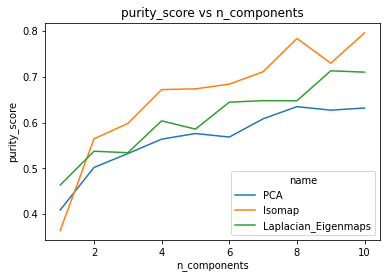

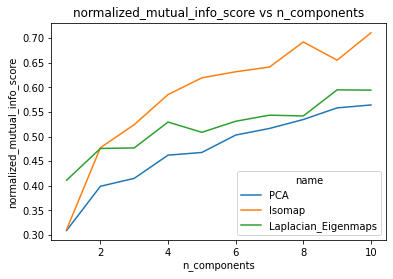

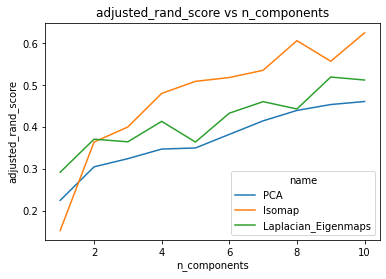

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
for metric in metric_funcs:
    ax = sns.lineplot(data = df_results,x = "n_components",y=metric,hue = "name")
    ax.set_title(f"{metric} vs n_components")
    plt.show()
    print("")